In [1]:
import pandas as pd
import xml.etree.ElementTree as ET
from collections import Counter
import itertools
from matplotlib import pyplot as plt
import numpy as np

mams_path = '../mams_atsa_train.xml'

xml_data = open(mams_path, 'r').read()  # Read file
root = ET.XML(xml_data)  # Parse XML

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
reviews = []
for _, sentence in enumerate(root):
    opinions = []
    text = ''

    opinions = []

    for _, sentence_children in enumerate(sentence):
        if sentence_children.tag == 'aspectTerms':
            for _, opinion in enumerate(sentence_children):
                opinions.append({
                    'target': opinion.attrib['term'],
                    'polarity': opinion.attrib['polarity'],
                    'from': int(opinion.attrib['from']),
                    'to': int(opinion.attrib['to']),
                })
        elif sentence_children.tag == 'text':
            text = sentence_children.text

    reviews.append({'text': text, 'opinions': opinions})

In [3]:
len(reviews)

4297

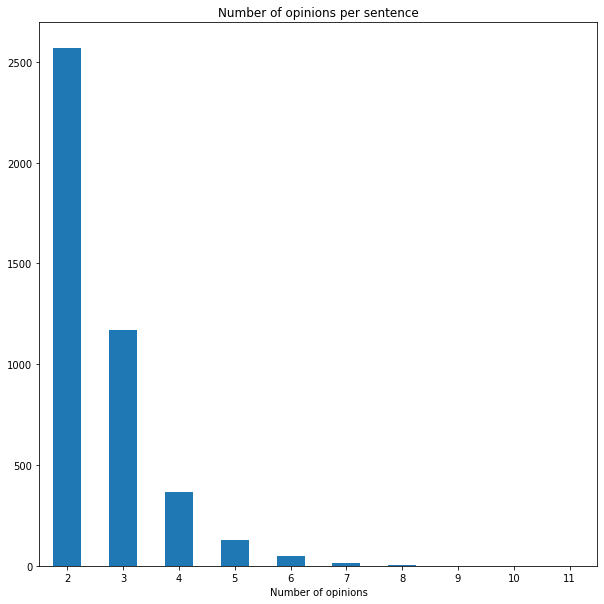

In [4]:
number_of_opinions_per_review = sorted(dict(Counter(list(map(lambda review: len(review['opinions']), reviews)))).items())

df_no_ops_per_rev = pd.DataFrame(number_of_opinions_per_review, columns=['Number of opinions', 'Count'])
df_no_ops_per_rev.plot.bar(x='Number of opinions', y='Count', rot=0)
plt.title('Number of opinions per sentence')
plt.legend().set_visible(False)
plt.savefig('noopinionspersentence.png', bbox_inches='tight')

In [5]:
print(f"No. total opinions: {np.sum(list(map(lambda x: len(x['opinions']), reviews)))}")

No. total opinions: 11186


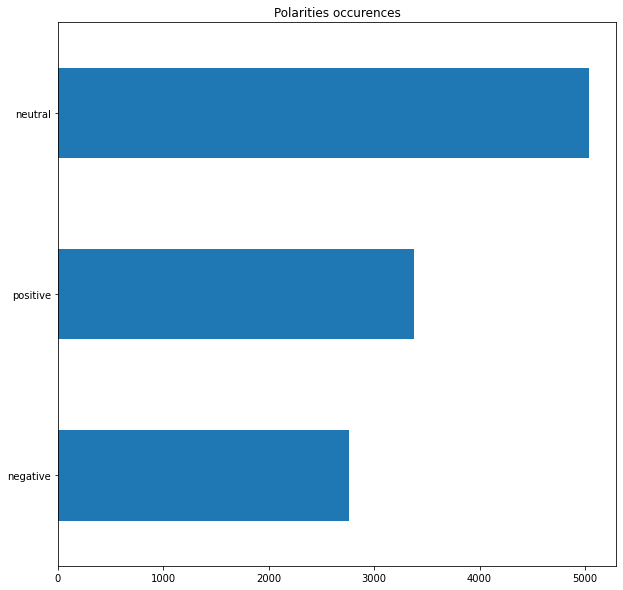

In [6]:
all_opinions = [review['opinions'] for review in reviews]
all_opinions = list(itertools.chain(*all_opinions))

all_categories = dict(Counter([opinion['polarity'] for opinion in all_opinions]))
df_categories_occurences = pd.DataFrame.from_dict(all_categories, orient='index')
df_categories_occurences.sort_values(0).plot.barh(rot=0)
plt.title('Polarities occurences')

# disable plt legend
plt.legend().set_visible(False)

plt.savefig('polaritiesoccurences.png', bbox_inches='tight')

In [7]:
df_categories_occurences

,0
negative,2764
positive,3380
neutral,5042


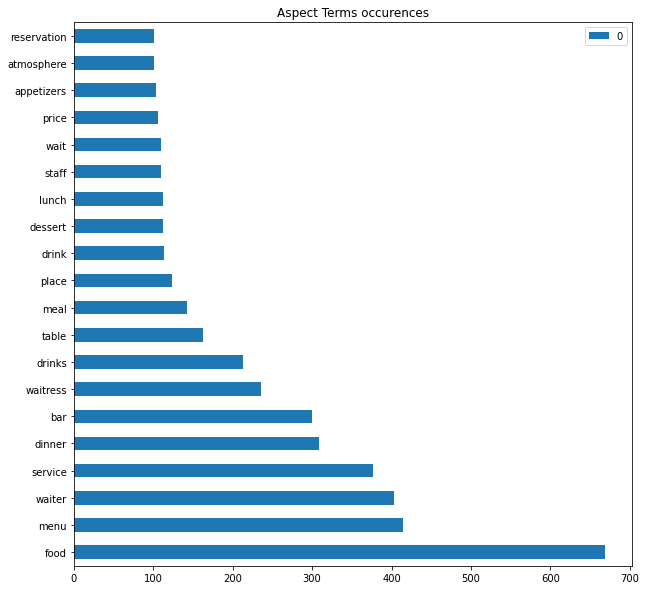

In [8]:
all_opinions = [review['opinions'] for review in reviews]
all_opinions = list(itertools.chain(*all_opinions))

all_terms = dict(Counter([opinion['target'] for opinion in all_opinions]))

df_terms_occurences = pd.DataFrame.from_dict(all_terms, orient='index')

most_freq_terms = df_terms_occurences.sort_values(0, ascending=False).head(20)
most_freq_terms.plot.barh(rot=0)
plt.title('Aspect Terms occurences')
plt.savefig('termsoccurences.png', bbox_inches='tight')

In [9]:
len(all_terms)

2586